In [2]:
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from matplotlib import rc
import seaborn as sns
%matplotlib inline

path = 'C:\\WINDOWS\\Fonts\\나눔고딕Bold.ttf'
fontprop = fm.FontProperties(fname=path)

import os
import shutil

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [3]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Model
from keras import optimizers, initializers, regularizers, metrics
from tensorflow import keras
from tensorflow.python.keras import layers,Sequential
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Dropout,Activation,MaxPooling2D,Flatten
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow_datasets as tfds
from keras.optimizers import Adam, RMSprop

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint

# 압축 풀기

In [6]:
# !unzip -qq '/content/drive/MyDrive/pytorch/test/test.zip' -d '/content/drive/MyDrive/pytorch/test/'
# !unzip -qq '/content/drive/MyDrive/pytorch/train/train.zip' -d '/content/drive/MyDrive/pytorch/train/'
!unzip -qq '/content/drive/MyDrive/pytorch/total/car.zip' -d '/content/drive/MyDrive/pytorch/total/'

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [7]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의

data_dir = '/content/drive/MyDrive/pytorch/total'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224,224),
  batch_size=64)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=123,
  image_size=(224,224),
  batch_size=64)

Found 9900 files belonging to 33 classes.
Using 7920 files for training.
Found 9900 files belonging to 33 classes.
Using 1980 files for validation.


# mobilenet 모델

In [9]:
from tensorflow.keras.applications.mobilenet import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))

num = 1
for layer in base_model.layers:
  if num > 27:
    layer.trainable = True
  num += 1

model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224,224,3)))

model.add(base_model)

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 

model.add(Dense(512, kernel_regularizer=regularizers.l2(0.0001)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(33, activation='softmax'))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

hist = model.fit(train_ds,batch_size=64,epochs=30,validation_data=val_ds)

Epoch 1/30
124/124 [==============================] - 73s 456ms/step - loss: 3.5495 - accuracy: 0.0379 - val_loss: 3.4239 - val_accuracy: 0.0505
Epoch 2/30
124/124 [==============================] - 55s 433ms/step - loss: 3.2509 - accuracy: 0.0620 - val_loss: 3.2211 - val_accuracy: 0.0737
Epoch 3/30
124/124 [==============================] - 56s 440ms/step - loss: 2.9056 - accuracy: 0.1025 - val_loss: 2.7692 - val_accuracy: 0.1187
Epoch 4/30
124/124 [==============================] - 55s 433ms/step - loss: 2.6604 - accuracy: 0.1540 - val_loss: 2.6371 - val_accuracy: 0.1768
Epoch 5/30
124/124 [==============================] - 55s 433ms/step - loss: 2.4766 - accuracy: 0.1981 - val_loss: 2.4031 - val_accuracy: 0.2394
Epoch 6/30
124/124 [==============================] - 56s 431ms/step - loss: 2.3605 - accuracy: 0.2288 - val_loss: 2.4781 - val_accuracy: 0.2247
Epoch 7/30
124/124 [==============================] - 55s 432ms/step - loss: 2.2642 - accuracy: 0.2538 - val_loss: 2.2945 - val_ac

In [11]:
model.evaluate(train_ds), model.evaluate(val_ds)

31/31 [==============================] - 7s 184ms/step - loss: 1.5856 - accuracy: 0.5293


([1.262904167175293, 0.5683080554008484],
 [1.5856225490570068, 0.5292929410934448])

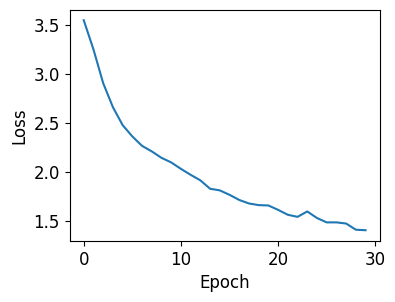

In [18]:
# 시각화하기
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

loss = hist.history['loss']
accuracy = hist.history['accuracy']

plt.plot(loss)
# plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()